In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

# Plotting Feb. 2024 Diamond MMP Data
## First, analyzing thiol films before/after


In [2]:
### Importing some functions here:
def read_maps(filepath):
    # This function reads maps and their max, returns them (note, maps are stored as dataframes here)
    aCD = pd.read_excel(filepath, sheet_name='aCD (mdeg)', header=0, index_col=0)
    CDmax = np.max(np.abs(aCD.to_numpy().flatten()))
    aCB = pd.read_excel(filepath, sheet_name='aCB (mdeg)', header=0, index_col=0)
    CBmax = np.max(np.abs(aCB.to_numpy().flatten()))
    aLD = pd.read_excel(filepath, sheet_name='aLD (mdeg)', header=0, index_col=0)
    LDmax = np.max(np.abs(aLD.to_numpy().flatten()))
    aLDp = pd.read_excel(filepath, sheet_name='aLDp (mdeg)', header=0, index_col=0)
    LDpmax = np.max(np.abs(aLDp.to_numpy().flatten()))
    aLB = pd.read_excel(filepath, sheet_name='LB-ind (mdeg)', header=0, index_col=0)
    LBmax = np.max(np.abs(aLB.to_numpy().flatten()))
    aLBp = pd.read_excel(filepath, sheet_name='LBp-ind (mdeg)', header=0, index_col=0)
    LBpmax = np.max(np.abs(aLBp.to_numpy().flatten()))
    agfac = pd.read_excel(filepath, sheet_name='aG-factor', header=0, index_col=0)
    gmax = np.max(np.abs(agfac.to_numpy().flatten()))
    absorb = pd.read_excel(filepath, sheet_name='Abs (au) (from M00)', header=0, index_col=0)
    
    return aCD, aCB, aLD, aLDp, aLB, aLBp, agfac, absorb#, CDmax, CBmax, LDmax, LDpmax, LBmax, LBpmax, gmax

def read_spectra(filepath):
    # This function reads spectra and returns them (note, stored as dataframes here)
    aCD = pd.read_excel(filepath, sheet_name='aCD (mdeg)', header=0, index_col=0)
    aCB = pd.read_excel(filepath, sheet_name='aCB (mdeg)', header=0, index_col=0)
    aLD = pd.read_excel(filepath, sheet_name='aLD (mdeg)', header=0, index_col=0)
    aLDp = pd.read_excel(filepath, sheet_name='aLDp (mdeg)', header=0, index_col=0)
    aLB = pd.read_excel(filepath, sheet_name='aLB (mdeg)', header=0, index_col=0)
    aLBp = pd.read_excel(filepath, sheet_name='aLBp (mdeg)', header=0, index_col=0)
    agfac = pd.read_excel(filepath, sheet_name='aG-factor', header=0, index_col=0)
    absorb = pd.read_excel(filepath, sheet_name='Abs (au) (from M00)', header=0, index_col=0)
    
    return aCD, aCB, aLD, aLDp, aLB, aLBp, agfac, absorb

def compute_dipoles(LD, LDp, subsample=True, plot=True, subsample_factor=8, scale=5e3): 
    LD = LD.to_numpy()
    LDp = LDp.to_numpy()
    dipoles = -1*LD + 1j * LDp # I don't know why the negative sign in front of LD worked. The sign of the dipole maps was wrong until I added that...
    magnitude = np.abs(dipoles)
    orientation = np.angle(dipoles)
    angle = np.arctan2(LD, LDp)
    angle_correction = np.degrees(np.arctan2(np.sin(angle), np.cos(angle)))
    
    x = np.linspace(0, len(LD)-1, dipoles.shape[1])
    y = np.linspace(0, len(LD)-1, dipoles.shape[0])
    X, Y = np.meshgrid(x, y)   
    
    if subsample == True:
        X = X[::subsample_factor, ::subsample_factor]
        Y = Y[::subsample_factor, ::subsample_factor]
        LD = LD[::subsample_factor, ::subsample_factor]
        LDp = LDp[::subsample_factor, ::subsample_factor]
        orientation = orientation[::subsample_factor, ::subsample_factor]
        magnitude = np.abs(dipoles[::subsample_factor, ::subsample_factor])
        angle_correction = np.degrees(np.arctan2(np.sin(orientation), np.cos(orientation)))
    
    if plot == True:
        fig, ax = plt.subplots()
        dip = ax.imshow(0.5*np.angle(dipoles), origin='lower', cmap='PiYG', alpha=1)
        ax.quiver(
            X, Y, -1*(magnitude * np.cos(np.radians(0.5 * angle_correction))),
            magnitude * np.sin(np.radians(0.5 * angle_correction)),
            angles='xy', scale_units='xy', scale=scale, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
        ax.quiver(
            X, Y, 1*(magnitude * np.cos(np.radians(0.5 * angle_correction))),
            -1*(magnitude * np.sin(np.radians(0.5 * angle_correction))),
            angles='xy', scale_units='xy', scale=scale, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
        plt.suptitle('Linear Effects')
        plt.show()
    
    return dipoles, magnitude, angle_correction, X, Y

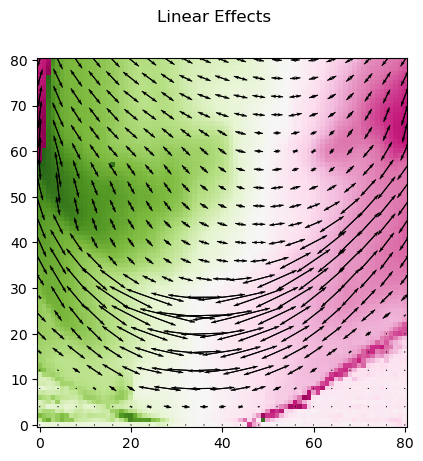

In [4]:
### Here, some filepaths / dummy tests
filepath_DEmapdense_post = "processing\goodscans_DE_midthiol\DEmidthiol4mmdense_329nm_2D matrix_from map_361nm_Mueller_2024_02_10_00_07_25_v1.xlsx"

aCD, aCB, aLD, aLDp, aLB, aLBp, agfac, absorb = read_maps(filepath_DEmapdense_post)
dip, mag, ang, X, Y = compute_dipoles(aLD, aLDp, subsample_factor=4, scale=5e3)

In [44]:
### First, putting in filepaths --> D2film
### Pre-thiol'd
filepath_mapdense_pre = r"processing\quick_and_good_D2new_prethiol\D2new_2mmdense_2D matrix_from map_329nm_Mueller_2024_02_10_13_25_05_v1.xlsx"
filepath_LHspectra_pre = r"processing\quick_and_good_D2new_prethiol\D2new_2x2specLH_Mueller_2024_02_10_17_13_41_v1.xlsx"
filepath_RHspectra_pre = r"processing\quick_and_good_D2new_prethiol\D2new_2x2specRH_Mueller_2024_02_10_16_26_37_v1.xlsx"
### Post-thiol'd
filepath_mapdense_post = r"processing\D2_postthiol_goodscans\D2new_2mmdense_2D matrix_from map_361nm_Mueller_2024_02_11_21_51_15_v1.xlsx"
filepath_LHspectra_post = r"processing\D2_postthiol_goodscans\D2new_2x2specLH_postthiol_Mueller_2024_02_11_20_56_17_v1.xlsx"
filepath_RHspectra_post = r"processing\D2_postthiol_goodscans\D2new_2x2specRH_postthiol_Mueller_2024_02_11_20_05_28_v1.xlsx"

In [36]:
### First, putting in filepaths --> DE film
### Pre-thiol'd
filepath_mapdense_pre = r"processing\quick_and_goodscans_DE_prethiol\DEprethiol4mmdense_2D matrix_from map_329nm_Mueller_2024_02_08_20_10_58_v1.xlsx"
filepath_LHspectra_pre = r"processing\quick_and_goodscans_DE_prethiol\DE_LH_1x5_highgspectra_Mueller_2024_02_09_08_50_17_v1.xlsx"
filepath_RHspectra_pre = r"processing\quick_and_goodscans_DE_prethiol\DE_RH_1x5_highgspectra_Mueller_2024_02_09_07_53_12_v1.xlsx"
### Post-thiol'd
filepath_mapdense_post = r"processing\goodscans_DE_midthiol\DEmidthiol4mmdense_329nm_2D matrix_from map_361nm_Mueller_2024_02_10_00_07_25_v1.xlsx"
filepath_LHspectra_post = r"processing\goodscans_DE_midthiol\DE_LH_1x5_highgspectra_Mueller_2024_02_09_18_50_07_v1.xlsx"
filepath_RHspectra_post = r"processing\goodscans_DE_midthiol\DE_RH_1x5_highgspectra_Mueller_2024_02_09_17_55_38_v1.xlsx"

In [16]:
### First, putting in filepaths --> D8 film
### Pre-thiol'd
filepath_mapdense_pre = r"processing\D8_prethiol_goodscans\D8old_densemap332_2D matrix_from map_332nm_Mueller_2024_02_07_22_33_00_v1.xlsx"
filepath_LHspectra_pre = r"processing\D8_prethiol_goodscans\d8_2x2_LHspectra_Mueller_2024_02_08_14_30_28_v1.xlsx"
filepath_RHspectra_pre = r"processing\D8_prethiol_goodscans\d8_2x2_RHspectra_Mueller_2024_02_08_13_40_41_v1.xlsx"
### Post-thiol'd --> pick one of the first 4, they're maps at different wavelengths
# filepath_mapdense_post = r"processing\D8_postthiol_goodscans\D8old_postthiol_4mm_sparse_2D matrix_from map_255nm_Mueller_2024_02_09_14_45_28_v1.xlsx"
# filepath_mapdense_post = r"processing\D8_postthiol_goodscans\D8old_postthiol_4mm_sparse_2D matrix_from map_345nm_Mueller_2024_02_09_13_15_14_v1.xlsx"
filepath_mapdense_post = r"processing\D8_postthiol_goodscans\D8old_postthiol_4mm_sparse_350nm_2D matrix_from map_350nm_Mueller_2024_02_09_12_29_19_v1.xlsx"
# filepath_mapdense_post = r"processing\D8_postthiol_goodscans\D8old_postthiol_4mmsparse_2D matrix_from map_361nm_Mueller_2024_02_09_14_00_14_v1.xlsx"
filepath_LHspectra_post = r"processing\D8_postthiol_goodscans\D8old_postthiol_2x2_LHspec_Mueller_2024_02_09_11_44_42_v1.xlsx"
filepath_RHspectra_post = r"processing\D8_postthiol_goodscans\D8old_postthiol_2x2RHspec_Mueller_2024_02_09_10_59_17_v1.xlsx"

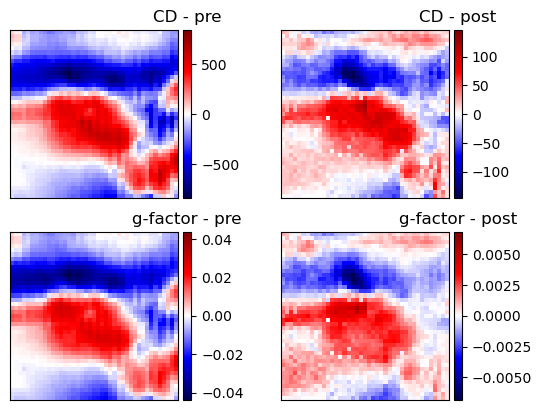

In [45]:
CDpre, CBpre, LDpre, LDppre, LBpre, LBppre, gfacpre, absorbpre = read_maps(filepath_mapdense_pre)
CDpremax = np.max(np.abs(CDpre.to_numpy().flatten()))
gfacpremax = np.max(np.abs(gfacpre.to_numpy().flatten()))

CDpost, CBpost, LDpost, LDppost, LBpost, LBppost, gfacpost, absorbpost = read_maps(filepath_mapdense_post)
CDpostmax = np.max(np.abs(CDpost.to_numpy().flatten()))
gfacpostmax = np.max(np.abs(gfacpost.to_numpy().flatten()))

### Plotting maps before vs. after
fig,axs = plt.subplots(ncols=2, nrows=2)
for ax in axs.flat:
    ax.set(xticks=[],yticks=[])
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    scalebar = ScaleBar(5e-5, length_fraction=0.15, box_alpha=0, 
                        location='upper left', label_formatter = lambda x,y:'', 
                        pad=0.5, sep=0)

CD=axs[0,0].imshow(CDpre, origin='lower', cmap='seismic', vmin=-1*CDpremax, vmax=CDpremax)
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(CD, cax=cax)
cax.set_title('CD - pre')

G=axs[1,0].imshow(gfacpre, origin='lower', cmap='seismic', vmin=-1*gfacpremax, vmax=gfacpremax)
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(G, cax=cax)
cax.set_title('g-factor - pre')

CD=axs[0,1].imshow(CDpost, origin='lower', cmap='seismic', vmin=-1*CDpostmax, vmax=CDpostmax)
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(CD, cax=cax)
cax.set_title('CD - post')

G=axs[1,1].imshow(gfacpost, origin='lower', cmap='seismic', vmin=-1*gfacpostmax, vmax=gfacpostmax)
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(G, cax=cax)
cax.set_title('g-factor - post')

# plt.suptitle('Circular Effects')
plt.show()

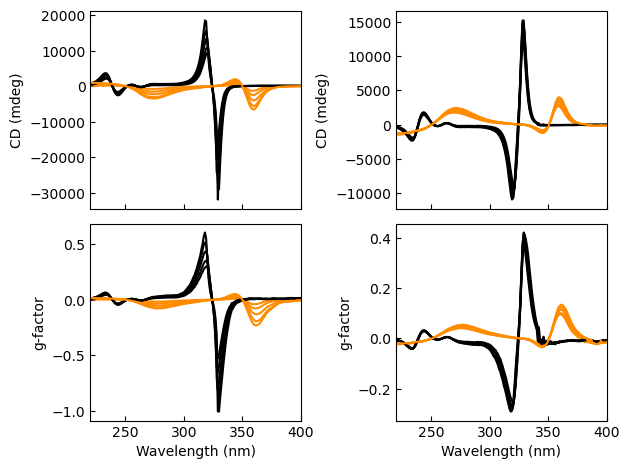

In [38]:
CDLHpre, CBLHpre, LDLHpre, LDpLHpre, LBLHpre, LBpLHpre, gfacLHpre, absorbLHpre = read_spectra(filepath_LHspectra_pre)
CDRHpre, CBRHpre, LDRHpre, LDpRHpre, LBRHpre, LBpRHpre, gfacRHpre, absorbRHpre = read_spectra(filepath_RHspectra_pre)

CDLHpost, CBLHpost, LDLHpost, LDpLHpost, LBLHpost, LBpLHpost, gfacLHpost, absorbLHpost = read_spectra(filepath_LHspectra_post)
CDRHpost, CBRHpost, LDRHpost, LDpRHpost, LBRHpost, LBpRHpost, gfacRHpost, absorbRHpost = read_spectra(filepath_RHspectra_post)


### Plotting spectra before vs. after
### First, CD, g-factor
fig,axs = plt.subplots(ncols=2, nrows=2, sharex=True)
for ax in axs.flat:
    ax.tick_params(axis='both', direction='in')
for i in range(len(CDLHpre.columns) - 2):
    axs[0,0].plot(CDLHpre[0], CDLHpre[i+1], color='k')
    axs[1,0].plot(gfacLHpre[0], gfacLHpre[i+1], color='k')
    axs[0,0].plot(CDLHpost[0], CDLHpost[i+1], color='darkorange')
    axs[1,0].plot(gfacLHpost[0], gfacLHpost[i+1], color='darkorange')
    
    axs[0,1].plot(CDRHpre[0], CDRHpre[i+1], color='k')
    axs[1,1].plot(gfacRHpre[0], gfacRHpre[i+1], color='k')
    axs[0,1].plot(CDRHpost[0], CDRHpost[i+1], color='darkorange')
    axs[1,1].plot(gfacRHpost[0], gfacRHpost[i+1], color='darkorange')

axs[1,1].set_xlim(220, 400)
axs[1,1].set_xticks([250, 300, 350, 400])
axs[1,0].set_xlabel('Wavelength (nm)')
axs[1,1].set_xlabel('Wavelength (nm)')
axs[0,0].set_ylabel('CD (mdeg)')
axs[1,0].set_ylabel('g-factor')
axs[0,1].set_ylabel('CD (mdeg)')
axs[1,1].set_ylabel('g-factor')
plt.tight_layout()
plt.show()

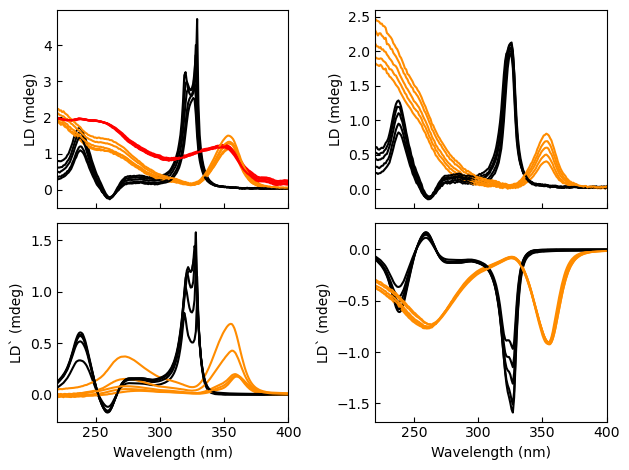

In [40]:
fig,axs = plt.subplots(ncols=2, nrows=2, sharex=True)
for ax in axs.flat:
    ax.tick_params(axis='both', direction='in')
for i in range(len(CDLHpre.columns) - 2):
    axs[0,0].plot(LDLHpre[0], LDLHpre[i+1], color='k')
    axs[1,0].plot(LDpLHpre[0], LDpLHpre[i+1], color='k')
    axs[0,0].plot(LDLHpost[0], LDLHpost[i+1], color='darkorange')
    axs[1,0].plot(LDpLHpost[0], LDpLHpost[i+1], color='darkorange')
    axs[0,0].plot(absorbLHpost[0], absorbLHpost[i+1], color='red')
    
    axs[0,1].plot(LDRHpre[0], LDRHpre[i+1], color='k')
    axs[1,1].plot(LDpRHpre[0], LDpRHpre[i+1], color='k')
    axs[0,1].plot(LDRHpost[0], LDRHpost[i+1], color='darkorange')
    axs[1,1].plot(LDpRHpost[0], LDpRHpost[i+1], color='darkorange')

axs[1,1].set_xlim(220, 400)
axs[1,1].set_xticks([250, 300, 350, 400])
axs[1,0].set_xlabel('Wavelength (nm)')
axs[1,1].set_xlabel('Wavelength (nm)')
axs[0,0].set_ylabel('LD (mdeg)')
axs[1,0].set_ylabel('LD` (mdeg)')
axs[0,1].set_ylabel('LD (mdeg)')
axs[1,1].set_ylabel('LD` (mdeg)')
plt.tight_layout()
plt.show()

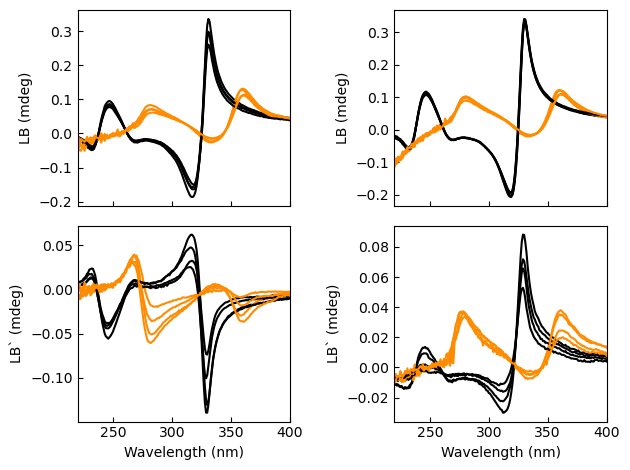

In [34]:
fig,axs = plt.subplots(ncols=2, nrows=2, sharex=True)
for ax in axs.flat:
    ax.tick_params(axis='both', direction='in')
for i in range(len(CDLHpre.columns) - 2):
    axs[0,0].plot(LBLHpre[0], LBLHpre[i+1], color='k')
    axs[1,0].plot(LBpLHpre[0], LBpLHpre[i+1], color='k')
    axs[0,0].plot(LBLHpost[0], LBLHpost[i+1], color='darkorange')
    axs[1,0].plot(LBpLHpost[0], LBpLHpost[i+1], color='darkorange')
    
    axs[0,1].plot(LBRHpre[0], LBRHpre[i+1], color='k')
    axs[1,1].plot(LBpRHpre[0], LBpRHpre[i+1], color='k')
    axs[0,1].plot(LBRHpost[0], LBRHpost[i+1], color='darkorange')
    axs[1,1].plot(LBpRHpost[0], LBpRHpost[i+1], color='darkorange')

axs[1,1].set_xlim(220, 400)
axs[1,1].set_xticks([250, 300, 350, 400])
axs[1,0].set_xlabel('Wavelength (nm)')
axs[1,1].set_xlabel('Wavelength (nm)')
axs[0,0].set_ylabel('LB (mdeg)')
axs[1,0].set_ylabel('LB` (mdeg)')
axs[0,1].set_ylabel('LB (mdeg)')
axs[1,1].set_ylabel('LB` (mdeg)')
plt.tight_layout()
plt.show()

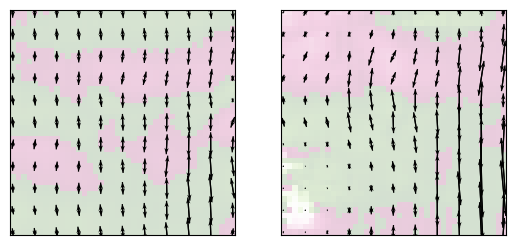

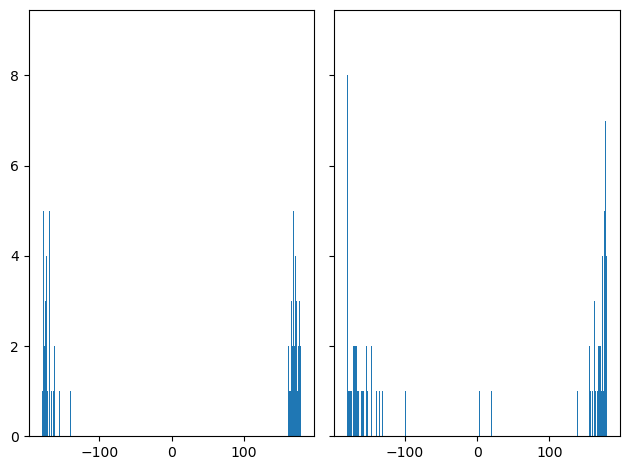

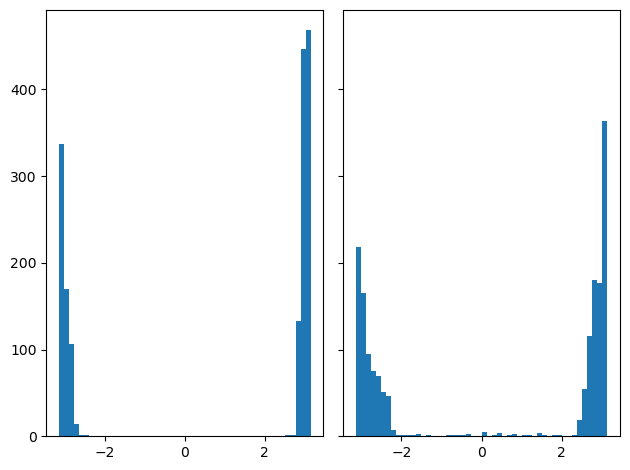

In [47]:
dip_pre, mag_pre, ang_pre, Xpre, Ypre = compute_dipoles(LDpre, LDppre, subsample_factor=4, scale=1e3, plot=False)
dip_post, mag_post, ang_post, Xpost, Ypost = compute_dipoles(LDpost, LDppost, subsample_factor=4, scale=1e3, plot=False)

scalepre = 1e4
scalepost = 1e3

fig, axs = plt.subplots(ncols=2, nrows=1)

for ax in axs.flat:
    ax.set(xticks=[],yticks=[])
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    scalebar = ScaleBar(5e-5, length_fraction=0.15, box_alpha=0, 
                        location='upper left', label_formatter = lambda x,y:'', 
                        pad=0.5, sep=0)

dippre = axs[0].imshow(0.5*np.angle(dip_pre), origin='lower', cmap='PiYG', alpha=0.2)
axs[0].quiver(
    Xpre, Ypre, -1*(mag_pre * np.cos(np.radians(0.5 * ang_pre))),
    mag_pre * np.sin(np.radians(0.5 * ang_pre)),
    angles='xy', scale_units='xy', scale=scalepre, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[0].quiver(
    Xpre, Ypre, 1*(mag_pre * np.cos(np.radians(0.5 * ang_pre))),
    -1*(mag_pre * np.sin(np.radians(0.5 * ang_pre))),
    angles='xy', scale_units='xy', scale=scalepre, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
dippost = axs[1].imshow(0.5*np.angle(dip_post), origin='lower', cmap='PiYG', alpha=0.2)
axs[1].quiver(
    Xpost, Ypost, -1*(mag_post * np.cos(np.radians(0.5 * ang_post))),
    mag_post * np.sin(np.radians(0.5 * ang_post)),
    angles='xy', scale_units='xy', scale=scalepost, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[1].quiver(
    Xpost, Ypost, 1*(mag_post * np.cos(np.radians(0.5 * ang_post))),
    -1*(mag_post * np.sin(np.radians(0.5 * ang_post))),
    angles='xy', scale_units='xy', scale=scalepost, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
plt.show()


# Histogram of orientation of TDMs to see if they are re-oriented
n_bins=500
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)
axs[0].hist(ang_pre.flatten(), bins=n_bins)
axs[1].hist(ang_post.flatten(), bins=n_bins)
plt.show()

n_bins=50
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True)
axs[0].hist(np.angle(dip_pre).flatten(), bins=n_bins)
axs[1].hist(np.angle(dip_post).flatten(), bins=n_bins)
plt.show()

In [209]:
print(np.shape(mag_pre))

(41, 41)


## Now, analyzing some other data

In [3]:
filepath_map_radial_t_319 = r"processing\quickscans_DC-D4old\DC_prethiol_8mmsparse_2D matrix_from map_319nm_Mueller_2024_02_09_16_43_41_v1.xlsx"
filepath_map_radial_t_329 = r"processing\quickscans_DC-D4old\DC_prethiol_8mmsparse_2D matrix_from map_329nm_Mueller_2024_02_09_15_45_21_v1.xlsx"
filepath_map_radial_b_329 = r"processing\quickscans_DD\DDbotradial_8mmsparse_2D matrix_from map_329nm_Mueller_2024_02_12_08_54_21_v1.xlsx"

In [4]:
CDbot, CBbot, LDbot, LDpbot, LBbot, LBpbot, gfacbot, absorbbot = read_maps(filepath_map_radial_b_329)
CDbotmax = np.max(np.abs(CDbot.to_numpy().flatten()))
gfacbotmax = np.max(np.abs(gfacbot.to_numpy().flatten()))

CDtop, CBtop, LDtop, LDptop, LBtop, LBptop, gfactop, absorbtop = read_maps(filepath_map_radial_t_329)
CDtopmax = np.max(np.abs(CDtop.to_numpy().flatten()))
gfactopmax = np.max(np.abs(gfactop.to_numpy().flatten()))

CDtop2, CBtop2, LDtop2, LDptop2, LBtop2, LBptop2, gfactop2, absorbtop2 = read_maps(filepath_map_radial_t_319)
CDtop2max = np.max(np.abs(CDtop2.to_numpy().flatten()))
gfactop2max = np.max(np.abs(gfactop2.to_numpy().flatten()))

First, comparing bottom and top...

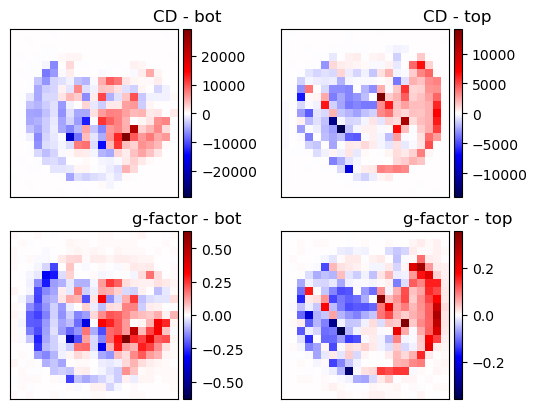

In [5]:
fig,axs = plt.subplots(ncols=2, nrows=2)
for ax in axs.flat:
    ax.set(xticks=[],yticks=[])
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    scalebar = ScaleBar(5e-5, length_fraction=0.15, box_alpha=0, 
                        location='upper left', label_formatter = lambda x,y:'', 
                        pad=0.5, sep=0)

CD=axs[0,0].imshow(CDbot, origin='lower', cmap='seismic', vmin=-1*CDbotmax, vmax=CDbotmax)
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(CD, cax=cax)
cax.set_title('CD - bot')

G=axs[1,0].imshow(gfacbot, origin='lower', cmap='seismic', vmin=-1*gfacbotmax, vmax=gfacbotmax)
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(G, cax=cax)
cax.set_title('g-factor - bot')

CD=axs[0,1].imshow(CDtop, origin='lower', cmap='seismic', vmin=-1*CDtopmax, vmax=CDtopmax)
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(CD, cax=cax)
cax.set_title('CD - top')

G=axs[1,1].imshow(gfactop, origin='lower', cmap='seismic', vmin=-1*gfactopmax, vmax=gfactopmax)
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(G, cax=cax)
cax.set_title('g-factor - top')

# plt.suptitle('Circular Effects')
plt.show()

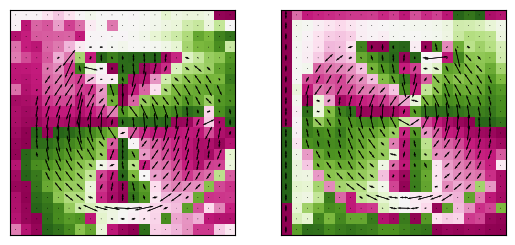

In [8]:
dip_1, mag_1, ang_1, X1, Y1 = compute_dipoles(LDbot, LDpbot, subsample_factor=1, scale=1e3, plot=False)
dip_2, mag_2, ang_2, X2, Y2 = compute_dipoles(LDtop, LDptop, subsample_factor=1, scale=1e3, plot=False)

scale1 = 5e4
scale2 = 5e4

fig, axs = plt.subplots(ncols=2, nrows=1)

for ax in axs.flat:
    ax.set(xticks=[],yticks=[])
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    scalebar = ScaleBar(5e-5, length_fraction=0.15, box_alpha=0, 
                        location='upper left', label_formatter = lambda x,y:'', 
                        pad=0.5, sep=0)

dip1 = axs[0].imshow(0.5*np.angle(dip_1), origin='lower', cmap='PiYG', alpha=1)
axs[0].quiver(
    X1, Y1, -1*(mag_1 * np.cos(np.radians(0.5 * ang_1))),
    mag_1 * np.sin(np.radians(0.5 * ang_1)),
    angles='xy', scale_units='xy', scale=scale1, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[0].quiver(
    X1, Y1, 1*(mag_1 * np.cos(np.radians(0.5 * ang_1))),
    -1*(mag_1 * np.sin(np.radians(0.5 * ang_1))),
    angles='xy', scale_units='xy', scale=scale1, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
dippost = axs[1].imshow(0.5*np.angle(dip_2), origin='lower', cmap='PiYG', alpha=1)
axs[1].quiver(
    X2, Y2, -1*(mag_2 * np.cos(np.radians(0.5 * ang_2))),
    mag_2 * np.sin(np.radians(0.5 * ang_2)),
    angles='xy', scale_units='xy', scale=scale2, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[1].quiver(
    X2, Y2, 1*(mag_2 * np.cos(np.radians(0.5 * ang_2))),
    -1*(mag_2 * np.sin(np.radians(0.5 * ang_2))),
    angles='xy', scale_units='xy', scale=scale2, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
plt.show()

Now, comparing 329 nm to 319 nm...

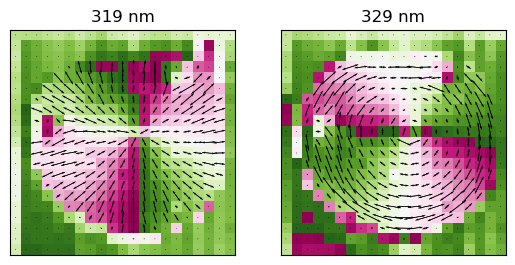

In [7]:
dip_1, mag_1, ang_1, X1, Y1 = compute_dipoles(LBtop2, LBptop2, subsample_factor=1, scale=1e3, plot=False)
dip_2, mag_2, ang_2, X2, Y2 = compute_dipoles(LBtop, LBptop, subsample_factor=1, scale=1e3, plot=False)

scale1 = 2e4
scale2 = 2e4

fig, axs = plt.subplots(ncols=2, nrows=1)

for ax in axs.flat:
    ax.set(xticks=[],yticks=[])
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    scalebar = ScaleBar(5e-5, length_fraction=0.15, box_alpha=0, 
                        location='upper left', label_formatter = lambda x,y:'', 
                        pad=0.5, sep=0)

dip1 = axs[0].imshow(0.5*np.angle(dip_1), origin='lower', cmap='PiYG', alpha=1)
axs[0].quiver(
    X1, Y1, -1*(mag_1 * np.cos(np.radians(0.5 * ang_1))),
    mag_1 * np.sin(np.radians(0.5 * ang_1)),
    angles='xy', scale_units='xy', scale=scale1, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[0].quiver(
    X1, Y1, 1*(mag_1 * np.cos(np.radians(0.5 * ang_1))),
    -1*(mag_1 * np.sin(np.radians(0.5 * ang_1))),
    angles='xy', scale_units='xy', scale=scale1, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[0].set_title('319 nm')

dippost = axs[1].imshow(0.5*np.angle(dip_2), origin='lower', cmap='PiYG', alpha=1)
axs[1].quiver(
    X2, Y2, -1*(mag_2 * np.cos(np.radians(0.5 * ang_2))),
    mag_2 * np.sin(np.radians(0.5 * ang_2)),
    angles='xy', scale_units='xy', scale=scale2, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[1].quiver(
    X2, Y2, 1*(mag_2 * np.cos(np.radians(0.5 * ang_2))),
    -1*(mag_2 * np.sin(np.radians(0.5 * ang_2))),
    angles='xy', scale_units='xy', scale=scale2, cmap='hsv', pivot='middle', headaxislength=4, headlength=5, headwidth=3.5)
axs[1].set_title('329 nm')
plt.show()